In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

: 

## Training dataset

In [2]:
auto_data = pd.read_csv('data/auto_policies_2017.csv')

In [3]:
auto_data.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60392 entries, 0 to 60391
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pol_number      60392 non-null  int64  
 1   pol_eff_dt      60392 non-null  object 
 2   gender          60392 non-null  object 
 3   agecat          55561 non-null  float64
 4   date_of_birth   60392 non-null  object 
 5   credit_score    57591 non-null  float64
 6   area            60392 non-null  object 
 7   traffic_index   56889 non-null  float64
 8   veh_age         60392 non-null  int64  
 9   veh_body        60392 non-null  object 
 10  veh_value       60392 non-null  float64
 11  claim_office    10030 non-null  object 
 12  numclaims       60392 non-null  int64  
 13  claimcst0       60392 non-null  float64
 14  annual_premium  60392 non-null  float64
dtypes: float64(6), int64(3), object(6)
memory usage: 6.9+ MB


In [4]:
auto_data.isna().sum()

pol_number            0
pol_eff_dt            0
gender                0
agecat             4831
date_of_birth         0
credit_score       2801
area                  0
traffic_index      3503
veh_age               0
veh_body              0
veh_value             0
claim_office      50362
numclaims             0
claimcst0             0
annual_premium        0
dtype: int64

In [5]:
auto_data.head(10)

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
0,64080188,7/10/2017,M,2.0,1/4/1989,631.0,B,140.9,4,TRUCK,0.924,NaN,0,0.000000,716.53
1,18917133,7/31/2017,M,2.0,6/21/1985,531.0,C,136.5,3,HBACK,1.430,B,1,583.010876,716.53
2,82742606,2/1/2017,M,6.0,7/25/1942,838.0,D,88.8,3,SEDAN,1.100,D,1,159.375757,716.53
3,43601997,10/17/2017,M,5.0,6/8/1959,835.0,E,NaN,2,SEDAN,2.090,NaN,0,0.000000,716.53
4,58746861,4/13/2017,F,4.0,5/16/1967,748.0,C,123.0,3,HBACK,0.803,C,1,143.555642,716.53
5,83346346,11/23/2017,M,5.0,11/2/1956,785.0,B,108.6,2,SEDAN,1.903,NaN,0,0.000000,716.53
6,92111059,11/29/2017,M,3.0,10/31/1976,759.0,E,75.0,4,STNWG,1.452,NaN,0,0.000000,716.53
7,69967688,4/24/2017,F,NaN,11/27/1947,836.0,C,88.5,1,HBACK,1.397,NaN,0,0.000000,716.53
8,58856161,7/19/2017,M,NaN,3/12/1967,688.0,A,50.0,1,SEDAN,2.838,NaN,0,0.000000,716.53
9,57786319,8/31/2017,M,NaN,12/25/1984,503.0,B,NaN,3,HBACK,1.936,B,1,1039.398350,716.53


In [6]:
auto_data.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,pol_number,agecat,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,annual_premium
count,60392.00000,55561.00000,57591.00000,56889.00000,60392.00000,60392.00000,60392.00000,60392.00000,60392.00000
mean,54992042.96900,3.48831,662.19319,103.89254,2.67375,1.95605,0.21425,644.87593,716.53000
std,25870034.66273,1.42513,136.45018,33.68868,1.06806,1.33028,0.55229,3354.63181,0.00000
min,10000396.00000,1.00000,301.00000,0.00000,1.00000,0.00000,0.00000,0.00000,716.53000
25%,32804730.50000,2.00000,602.00000,80.30000,2.00000,1.11100,0.00000,0.00000,716.53000
50%,55001798.50000,3.00000,682.00000,108.30000,3.00000,1.65000,0.00000,0.00000,716.53000
75%,77296135.00000,5.00000,772.00000,132.00000,4.00000,2.36500,0.00000,0.00000,716.53000
max,99998382.00000,6.00000,850.00000,207.00000,4.00000,38.01600,5.00000,69478.89783,716.53000


In [7]:
def clean_agecat(df, mapping):
    """
    Imputes missing age categories with the correct bucket.
    input: orignal dataframe, mapping file with min, max date of birth
    output: imputed df    
    """
    df = df.copy(deep=True)
    for index, row in mapping.iterrows():
        agecat, min_val, max_val = row
        df.loc[((df['date_of_birth'] >= min_val) & (df['date_of_birth'] <= max_val)), 'agecat'] = agecat
    return df

In [8]:
auto_data['date_of_birth'] = pd.to_datetime(auto_data['date_of_birth'])
# auto_data['dob_year'] = auto_data['date_of_birth'].dt.year
# auto_data['dob_month'] = auto_data['date_of_birth'].dt.month
# auto_data['dob_day'] = auto_data['date_of_birth'].dt.day

In [9]:
agecat_df = auto_data.groupby('agecat')['date_of_birth'].agg(["min", "max"]).reset_index(drop=False)
agecat_df

,agecat,min,max
0,1.0,1990-01-01,1999-12-31
1,2.0,1980-01-01,1989-12-31
2,3.0,1970-01-01,1979-12-30
3,4.0,1960-01-01,1969-12-31
4,5.0,1950-01-01,1959-12-31
5,6.0,1923-02-08,1949-12-31


In [10]:
auto_data = clean_agecat(auto_data, agecat_df)

In [11]:
auto_data['claim_office'] = auto_data['claim_office'].fillna('Missing/Null')

Mean:  662
Median:  682


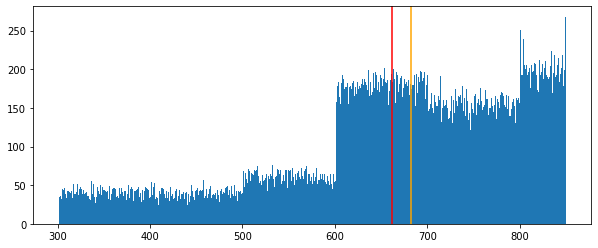

In [12]:
print('Mean: ', int(auto_data['credit_score'].mean()))
print('Median: ', int(auto_data['credit_score'].median()))
plt.figure(figsize= (10,4))
plt.hist(auto_data['credit_score'], bins = 549)
plt.axvline(int(auto_data['credit_score'].mean()), color = 'r')
plt.axvline(int(auto_data['credit_score'].median()), color = 'orange')
plt.show()

In [13]:
auto_data['credit_score'] = auto_data['credit_score'].fillna(int(auto_data['credit_score'].median()))

In [14]:
auto_data.head(5)

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
0,64080188,7/10/2017,M,2.0,1989-01-04,631.0,B,140.9,4,TRUCK,0.924,Missing/Null,0,0.000000,716.53
1,18917133,7/31/2017,M,2.0,1985-06-21,531.0,C,136.5,3,HBACK,1.430,B,1,583.010876,716.53
2,82742606,2/1/2017,M,6.0,1942-07-25,838.0,D,88.8,3,SEDAN,1.100,D,1,159.375757,716.53
3,43601997,10/17/2017,M,5.0,1959-06-08,835.0,E,NaN,2,SEDAN,2.090,Missing/Null,0,0.000000,716.53
4,58746861,4/13/2017,F,4.0,1967-05-16,748.0,C,123.0,3,HBACK,0.803,C,1,143.555642,716.53


Mean:  103
Median:  108


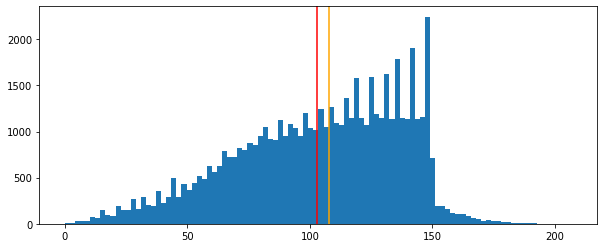

In [15]:
print('Mean: ', int(auto_data['traffic_index'].mean()))
print('Median: ', int(auto_data['traffic_index'].median()))
plt.figure(figsize= (10,4))
plt.hist(auto_data['traffic_index'], bins = 100)
plt.axvline(int(auto_data['traffic_index'].mean()), color = 'r')
plt.axvline(int(auto_data['traffic_index'].median()), color = 'orange')
plt.show()

In [16]:
traffic_index_df = auto_data.groupby('area')['traffic_index'].agg("mean").reset_index(drop=False)
traffic_index_df['traffic_index'] = round(traffic_index_df['traffic_index'], 1)
traffic_index_dict = dict(zip(traffic_index_df['area'], traffic_index_df['traffic_index']))

auto_data['traffic_index'] = auto_data['traffic_index'].fillna(auto_data['area'].map(traffic_index_dict))

In [20]:
auto_data.isna().sum()

pol_number        0
pol_eff_dt        0
gender            0
agecat            0
date_of_birth     0
credit_score      0
area              0
traffic_index     0
veh_age           0
veh_body          0
veh_value         0
claim_office      0
numclaims         0
claimcst0         0
annual_premium    0
dtype: int64

## Testing dataset

In [33]:
cust_data = pd.read_csv('data/auto_potential_customers_2018.csv')

In [35]:
cust_data['date_of_birth'] = pd.to_datetime(cust_data['date_of_birth'])

In [36]:
cust_data.head(5)

,quote_number,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value
0,29323463,F,4.0,1968-04-14,750.0,C,124.5,2,HBACK,1.100
1,16732441,M,2.0,1984-10-04,567.0,F,NaN,3,STNWG,2.079
2,68744228,M,4.0,1962-11-30,378.0,D,111.4,3,HDTOP,2.354
3,30875047,F,3.0,1973-05-17,807.0,E,NaN,4,UTE,1.969
4,37049210,M,6.0,1945-10-02,844.0,C,111.0,1,HBACK,1.969


In [37]:
cust_data.isna().sum()

quote_number       0
gender             0
agecat           632
date_of_birth      0
credit_score     355
area               0
traffic_index    449
veh_age            0
veh_body           0
veh_value          0
dtype: int64

In [40]:
cust_data = clean_agecat(cust_data, agecat_df)

cust_data['credit_score'] = cust_data['credit_score'].fillna(int(auto_data['credit_score'].median()))



traffic_index_test_df = cust_data.groupby('area')['traffic_index'].agg("mean").reset_index(drop=False)
traffic_index_test_df['traffic_index'] = round(traffic_index_test_df['traffic_index'], 1)
traffic_index_test_dict = dict(zip(traffic_index_test_df['area'], traffic_index_test_df['traffic_index']))

cust_data['traffic_index'] = cust_data['traffic_index'].fillna(cust_data['area'].map(traffic_index_test_dict))


In [41]:
cust_data.head(10)

,quote_number,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value
0,29323463,F,4.0,1968-04-14,750.0,C,124.5,2,HBACK,1.100
1,16732441,M,2.0,1984-10-04,567.0,F,114.6,3,STNWG,2.079
2,68744228,M,4.0,1962-11-30,378.0,D,111.4,3,HDTOP,2.354
3,30875047,F,3.0,1973-05-17,807.0,E,44.6,4,UTE,1.969
4,37049210,M,6.0,1945-10-02,844.0,C,111.0,1,HBACK,1.969
5,90859532,M,1.0,1995-01-19,743.0,C,133.5,1,HBACK,2.090
6,58572612,M,5.0,1953-03-27,647.0,F,156.0,3,HDTOP,2.915
7,32679788,M,4.0,1964-09-20,785.0,A,80.5,2,SEDAN,1.925
8,90845095,F,1.0,1999-01-17,601.0,B,105.2,2,HBACK,1.430
9,97453004,F,3.0,1979-12-02,672.0,C,145.5,2,STNWG,3.905


In [45]:
auto_data['numclaims'].value_counts()

0    50362
1     8034
2     1336
3      459
4      149
5       52
Name: numclaims, dtype: int64

In [47]:
auto_data['claimcst0'].value_counts()

0.000000       50362
799.326505         1
477.207640         1
674.691404         1
454.579742         1
               ...  
849.643445         1
5630.078311        1
3933.829301        1
1883.314417        1
2585.500087        1
Name: claimcst0, Length: 10031, dtype: int64

In [53]:
cust_data.to_csv('data/auto_potential_customers_2018_cleaned.csv', index= False)

In [54]:
auto_data.to_csv('data/auto_policies_2017_cleaned.csv', index = False)

## Features